# Introduction:

## Data Set Information

The dataset is from https://www.kaggle.com/ronitf/heart-disease-uci.  

Physiological information from patients who participated a heart diease study in 4 medical institutes.  This database originally contains 76 attributes, but all published experiments refer to using a subset of **14** of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

#### Column information:
* Age (age in years)
* Sex (1 = male; 0 = female)
* CP (chest pain type, Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic )
* TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* CHOL (serum cholestoral in mg/dl)
* FBS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RESTECG (resting electrocardiographic results, 2 = hyp; 0 = normal)
* THALACH (maximum heart rate achieved)
* EXANG (exercise induced angina (1 = yes; 0 = no))
* OLDPEAK (ST depression induced by exercise relative to rest)
* SLOPE (the slope of the peak exercise ST segment, -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping)
* CA (number of major vessels (0-3) colored by flourosopy)
* THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
* TARGET (1 or 0, diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing).  Target= 0 : No Disease, Target > 0 : Disease

Among the 14 columns, 'target' is the goal as the outcome of model.  The 6 numerical variables include age, trestbps, chol, thalach, oldpeak, and ca, whereas the 7 categorical variables are sex, cp, fbs, restecg, exang, slope, and thal.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
%matplotlib inline

#input dataset
df = pd.read_csv('processed.cleveland.csv', na_values=['?'])

# print first 8 rows
print ("\n\nFirst 8 rows\n")
print (df.head(8))




First 8 rows

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   
5   56    1   2       120   236    0        0      178      0      0.8      1   
6   62    0   4       140   268    0        2      160      0      3.6      3   
7   57    0   4       120   354    0        0      163      1      0.6      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  
5  0.0   3.0       0  
6  2.0   3.0       3  
7  0.0   3.0       0  


In [2]:
# show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          299 non-null float64
thal        301 non-null float64
target      303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


We notice that some cells are missing and originally labelled as '?'.  To organize the data, the following steps are performed:
* Type for categorical columns should be 'str' instead of 'int64'. 
* In 'target' column, any value greater than "0" should be labeled as "1" (to fit with data description)
* Missing data should be labeled as NaN or None.  

In [3]:
# change the type for categorical variables
df.sex = df.sex.astype('str')
df.cp = df.cp.astype('str')
df.fbs = df.fbs.astype('str')
df.restecg = df.restecg.astype('str')
df.exang = df.exang.astype('str')
df.slope = df.slope.astype('str')
df.thal = df.thal.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null object
cp          303 non-null object
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null object
restecg     303 non-null object
thalach     303 non-null int64
exang       303 non-null object
oldpeak     303 non-null float64
slope       303 non-null object
ca          299 non-null float64
thal        303 non-null object
target      303 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 33.2+ KB


The number of entries for column 'thal' is changed from 301 to 303 since the type of thal is now string.  This makes 'NaN' considered as a string.  Therefore, the following code is to change the 'NaN' string to 'None'.   

In [4]:
# change the target notation
df['target']=np.where(df['target'] >= 1, 1, df['target'])

# validate the missing data in 'thal'
df['thal']=np.where(df['thal'] >= 'NaN', None, df['thal'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null object
cp          303 non-null object
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null object
restecg     303 non-null object
thalach     303 non-null int64
exang       303 non-null object
oldpeak     303 non-null float64
slope       303 non-null object
ca          299 non-null float64
thal        301 non-null object
target      303 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 33.2+ KB


In [5]:
# check if any missing data
# '0' means no missing 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

To check the integrity of the data, 'isna' is used here.  The result shows 4 missing cells in 'ca', and 2 missing in 'thal'. 

## What are the risk factors for heart disease?
The project focuses on the data visualization using python, particularly pyplot and seaborn.  The information is extracted from the data using graphs and tables.  Our question is: what are the high risk factors for heart disease?  Are men more likely to develope heart disease?  Are people with high cholesterol in their blood more likely to have heart disease? 

Note: Multinomial logistic regressions are NOT present in this capstone 1 project and would be covered in the later capstone projects.  

# Data Analysis
## Descriptive Statistics

In [6]:
# print descriptive stats for numerical data
print (df[['age','trestbps', 'chol', 'thalach','oldpeak', 'ca']].describe())
df.sex.value_counts()

              age    trestbps        chol     thalach     oldpeak          ca
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604    0.672241
std      9.038662   17.599748   51.776918   22.875003    1.161075    0.937438
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000    0.000000
75%     61.000000  140.000000  275.000000  166.000000    1.600000    1.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    3.000000


1    206
0     97
Name: sex, dtype: int64

The study includes 303 patients (206 male and 97 female).  There are 2x more men than women participating the study.  The average age for all participants is 54.44 with standard deviation 9.03.  The average blood cholesterol is 246.7 +/- 51.8. 

In [7]:
print(df.target.value_counts())
print(df.cp.value_counts())

0    164
1    139
Name: target, dtype: int64
4    144
3     86
2     50
1     23
Name: cp, dtype: int64


Among all 303 patients, 139 patients are diagnosed with heart disease.  144 patients show asymptomatic chest pain (no pain), 86 patients have no-anginal pain, 50 patients have atypical angina pain and 23 have typical angina.  

## Data visualization
### Data visualization on description statistics

   age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope   ca  \
0   63   M  1       145   233   1       2      150     0      2.3     3  0.0   
1   67   M  4       160   286   0       2      108     1      1.5     2  3.0   
2   67   M  4       120   229   0       2      129     1      2.6     2  2.0   
3   37   M  3       130   250   0       0      187     0      3.5     3  0.0   
4   41   F  2       130   204   0       2      172     0      1.4     1  0.0   

  thal  target  
0  6.0       0  
1  3.0       1  
2  7.0       1  
3  3.0       0  
4  3.0       0  


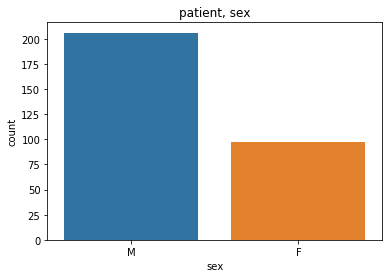

In [8]:
# Sex count
df['sex']=df['sex'].replace(['1','0'],['M','F'])
print(df.head())
sns.countplot(x='sex', data=df)
plt.title('patient, sex')
plt.show()

Above is the barplot (countplot) for the number of patients in the data grouped by sex.  

In [9]:
# Table of age statistics grouped by sex
df.groupby('sex').age.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,97.0,55.721649,9.370546,34.0,50.0,57.0,63.00,76.0
M,206.0,53.834951,8.836838,29.0,47.0,54.5,59.75,77.0


The table above shows the mean, std, and quardrtiles of age in males and females.  Violin plot can be used here to show distribution of sex and age for data visualization.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


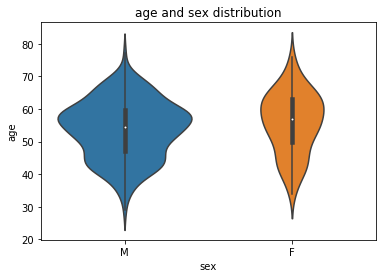

In [10]:
# violin plot on sex and age
ax = sns.violinplot(x='sex', y='age', scale = 'count', data = df)
plt.title('age and sex distribution')
plt.show()

The visualization of the data is agreeable to the descriptive statistics.  
* There are more males than females in the study. (206:97)
* Female mean age is greater than male mean age (F:55.7, M:53.4).  

### Data visualization for numberical variables
#### Histogram and bar chart

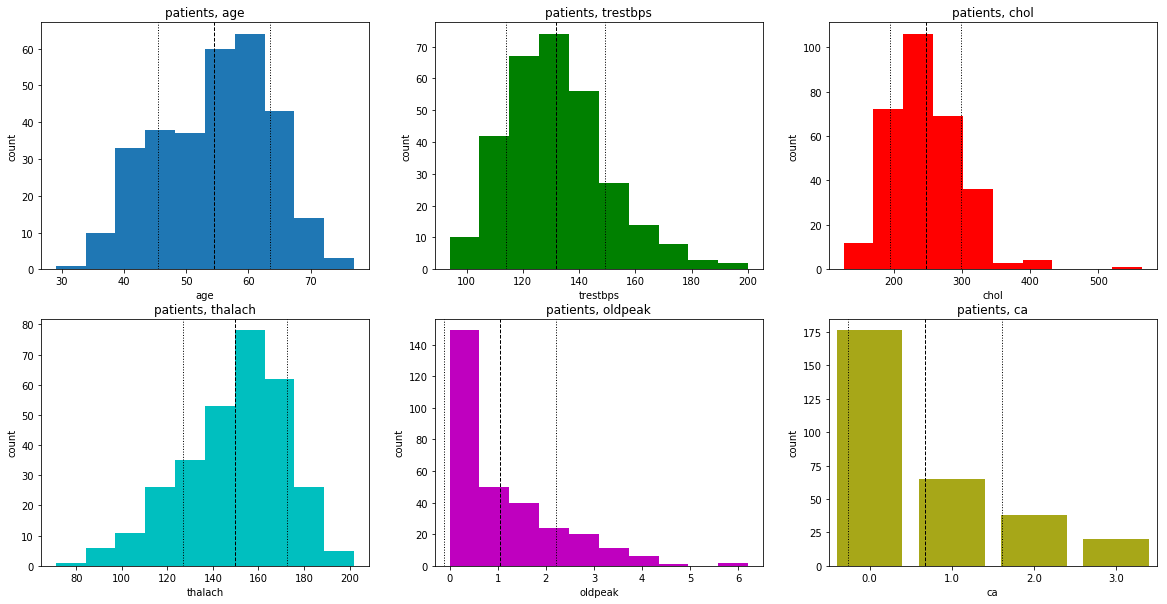

In [11]:
fig=plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.title('patients, age')
plt.axvline(df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['age'].mean()+df['age'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['age'].mean()-df['age'].std(), color='k', linestyle='dotted', linewidth=1)


plt.subplot(2, 3, 2)
plt.hist(df['trestbps'], color ='g')
plt.xlabel('trestbps')
plt.ylabel('count')
plt.title('patients, trestbps')
plt.axvline(df['trestbps'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['trestbps'].mean()+df['trestbps'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['trestbps'].mean()-df['trestbps'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 3)
plt.hist(df['chol'], color ='r')
plt.xlabel('chol')
plt.ylabel('count')
plt.title('patients, chol')
plt.axvline(df['chol'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['chol'].mean()+df['chol'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['chol'].mean()-df['chol'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 4)
plt.hist(df['thalach'], color ='c')
plt.xlabel('thalach')
plt.ylabel('count')
plt.title('patients, thalach')
plt.axvline(df['thalach'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['thalach'].mean()+df['thalach'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['thalach'].mean()-df['thalach'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 5)
plt.hist(df['oldpeak'], color ='m')
plt.xlabel('oldpeak')
plt.ylabel('count')
plt.title('patients, oldpeak')
plt.axvline(df['oldpeak'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['oldpeak'].mean()+df['oldpeak'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['oldpeak'].mean()-df['oldpeak'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 6)
#plt.hist(df['ca'])
sns.countplot(x='ca', data=df, color ='y')
plt.xlabel('ca')
plt.ylabel('count')
plt.title('patients, ca')
plt.axvline(df['ca'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['ca'].mean()+df['ca'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['ca'].mean()-df['ca'].std(), color='k', linestyle='dotted', linewidth=1)
plt.show()

The graphs above show the distribution of the numerical variables.  One standard deviation from the mean is also labeled in the graphs for better visualization.  

#### Box plot for numerical variables for patients with/without disease
#### Question: Are people with high cholesterol likely to get heart disease?


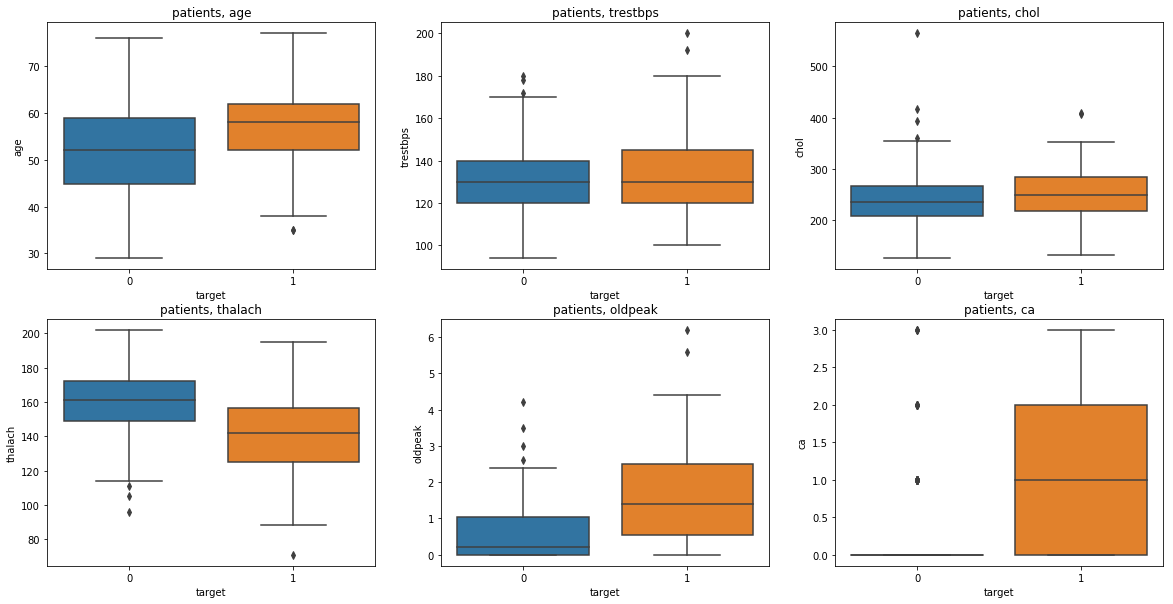

In [12]:
fig=plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='target', y='age', data=df)
plt.xlabel('target')
plt.ylabel('age')
plt.title('patients, age')

plt.subplot(2, 3, 2)
sns.boxplot(x='target', y='trestbps', data=df)
plt.xlabel('target')
plt.ylabel('trestbps')
plt.title('patients, trestbps')

plt.subplot(2, 3, 3)
sns.boxplot(x='target', y='chol', data=df)
plt.xlabel('target')
plt.ylabel('chol')
plt.title('patients, chol')

plt.subplot(2, 3, 4)
sns.boxplot(x='target', y='thalach', data=df)
plt.xlabel('target')
plt.ylabel('thalach')
plt.title('patients, thalach')

plt.subplot(2, 3, 5)
sns.boxplot(x='target', y='oldpeak', data=df)
plt.xlabel('target')
plt.ylabel('oldpeak')
plt.title('patients, oldpeak')

plt.subplot(2, 3, 6)
sns.boxplot(x='target', y='ca', data=df)
plt.xlabel('target')
plt.ylabel('ca')
plt.title('patients, ca')

plt.show()

Above are the boxplot for patients with disease (orange box) vs patient with no disease (blue) in all 6 numerical variables. Patients' age, trestbps, and **chol** are not correlated to the disease.  However, in the thalach graph (lower left), people who have lower thalach tend to have disease (target=1, negative correlation) .  In the oldpeak graph (lower center), people who have higher oldpeak tend to have disease.  In the ca graph, people who have higher ca tends to have disease.  In fact, ca is one of the methods to diagnose heart disease and ca and target are likely dependent variables.

### Linear Correlation for numerical variables

In [13]:
df.corr()

,age,trestbps,chol,thalach,oldpeak,ca,target
age,1.000000,0.284946,0.208950,-0.393806,0.203805,0.362605,0.223120
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171,0.098773,0.150825
chol,0.208950,0.130120,1.000000,-0.003432,0.046564,0.119000,0.085164
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.264246,-0.417167
oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000,0.295832,0.424510
ca,0.362605,0.098773,0.119000,-0.264246,0.295832,1.000000,0.460442
target,0.223120,0.150825,0.085164,-0.417167,0.424510,0.460442,1.000000


#### Heatmap to visualize the correlation coefficients.  

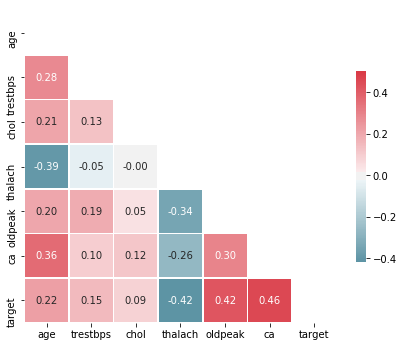

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, annot=True, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, fmt= '.2f', cbar_kws={"shrink": .5})


# f,ax = plt.subplots(figsize=(7, 7))

# sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

This heat map above shows the correlation between each numerical inputs and the predition (target).  The bottom line information is at the very bottom row where the correlation coefficients are -0.42, 0.42 and 0.46 between target and (thalach, oldpeak and ca) respsctively. Interestingly, the correlation coefficient between target and (age, trestbps, and chol) are low.  Further analysis will be focused on thalach, oldpeak, and ca.  


#### swarm plot and scatterplot to visualize the numerical variables

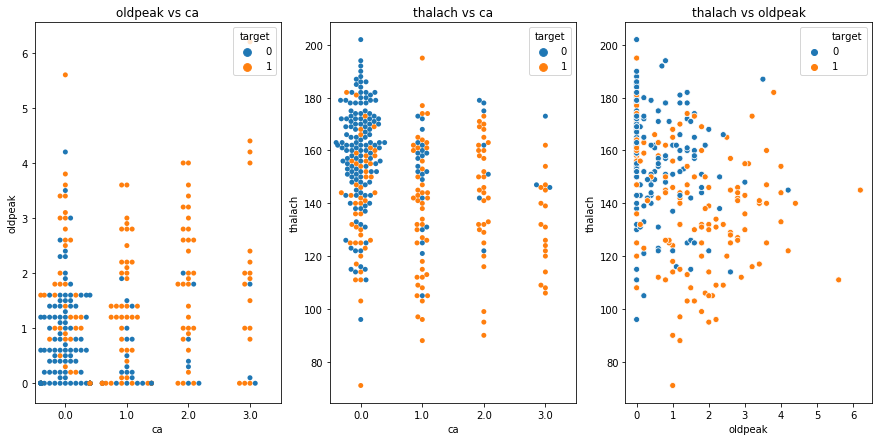

In [15]:
fig=plt.figure(figsize = (15, 7))
plt.subplot(1, 3, 1)
sns.swarmplot(x='ca', y='oldpeak', hue='target', data=df)
plt.legend(title= 'target', loc="upper right")
plt.title('oldpeak vs ca')

plt.subplot(1, 3, 2)
sns.swarmplot(x='ca', y='thalach', hue='target', data=df)
plt.title('thalach vs ca')

plt.subplot(1, 3, 3)
sns.scatterplot(x='oldpeak', y='thalach', hue='target', data=df)
plt.title('thalach vs oldpeak')

plt.show()

In general, **high oldpeak, high ca and low thalach** are the high factors. 

### Data visualization for categorical variables

#### Question: Are men more likely to get heart disease?

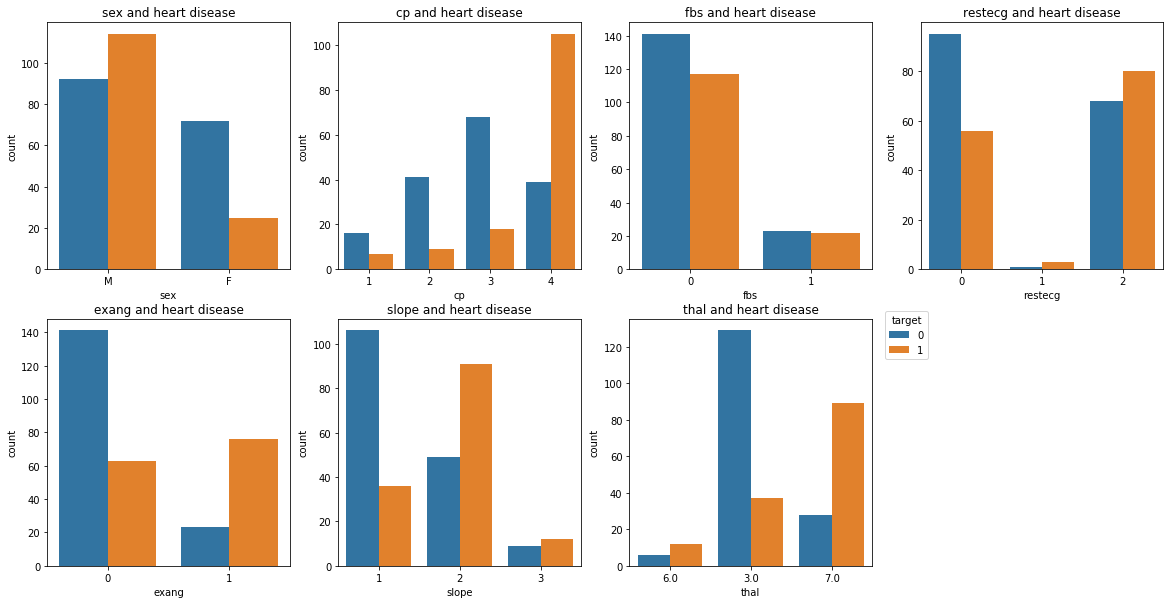

In [16]:
fig =plt.figure(figsize = (20, 10))

plt.subplot(2, 4, 1)
ax1=sns.countplot(x="sex", hue= "target", data=df)
ax1.get_legend().remove()
plt.title('sex and heart disease')


plt.subplot(2, 4, 2)
ax2=sns.countplot(x="cp", hue= "target", data=df)
ax2.get_legend().remove()
plt.title('cp and heart disease')

plt.subplot(2, 4, 3)
ax3=sns.countplot(x="fbs", hue= "target", data=df)
ax3.get_legend().remove()
plt.title('fbs and heart disease')

plt.subplot(2, 4, 4)
ax4=sns.countplot(x="restecg", hue= "target", data=df)
ax4.get_legend().remove()
plt.title('restecg and heart disease')

plt.subplot(2, 4, 5)
ax5=sns.countplot(x="exang", hue= "target", data=df)
ax5.get_legend().remove()
plt.title('exang and heart disease')

plt.subplot(2, 4, 6)
ax6=sns.countplot(x="slope", hue= "target", data=df)
ax6.get_legend().remove()
plt.title('slope and heart disease')

plt.subplot(2, 4, 7)
ax7=sns.countplot(x="thal", hue= "target", data=df)
plt.title('thal and heart disease')
ax7.legend(title='target', loc='upper right', bbox_to_anchor=(1.25, 1.05))


plt.show()

The data shows that sex is a risk factor.  Male is high risk factor to heart disease compared to female.  In addition to sex, the following categories are high risk factors: CP=4 (compared to cp=1),  exang =1 (compared to exang =0), slope=2 (compared to slope =1) and thal=7 (compared to thal =3) 

### Data Visualization for both numerical and categorical variables
#### Question: What are the other risk factors for heart disease? 

The graphs below shows the plot for two numerical variables (oldpeak and thalach).  

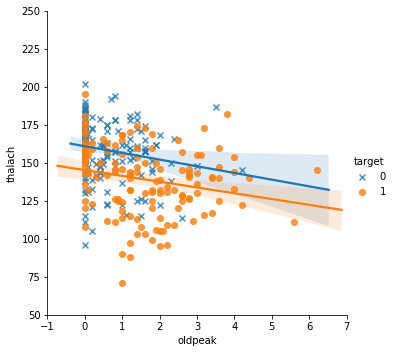

In [17]:
ax= sns.lmplot(x="oldpeak", y="thalach", hue="target", markers=["x", "o"], data=df)
plt.xlim(-1, 7)
plt.ylim(50, 250)
plt.show()
plt.show()

When category "slope" is added to the graph, the graph contains 3 supplots and each of the subplots represent one slope value as below.

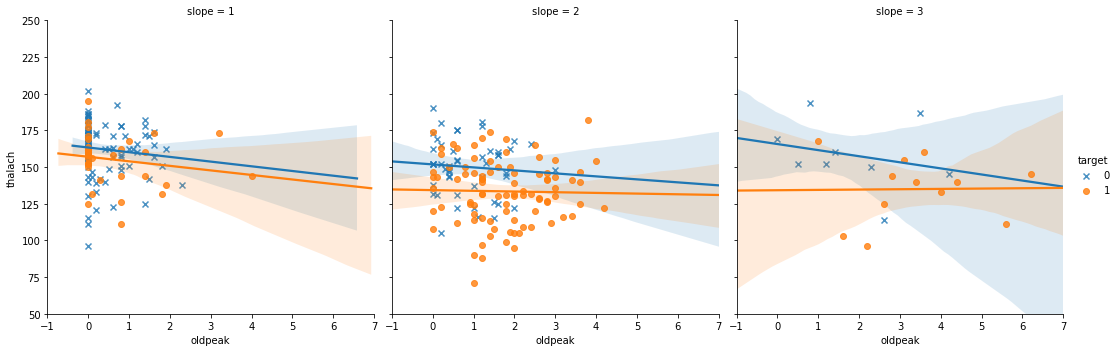

In [18]:
ax= sns.lmplot(x="oldpeak", y="thalach", hue="target", col="slope", markers=["x", "o"], data=df)
plt.xlim(-1, 7)
plt.ylim(50, 250)
plt.show()
plt.show()

There are significantly more orange dots in the center subplot than in other two subplots, indicating that slope=2 is a risK factor.  

# Conclusions
Data visualization is an important tool to help people digest the information from the dataset.  In this capstone project, I focus on using data visualization to find out the possible risk factors.  The data visualization shows that sex, cp, oldpeak, exang, slope, thal, thalach, oldpeak, and ca are likely risk factors.  For example, a person who is male (sex =1) with asymptomatic pain (cp=4) is of particular risk. 

However, the results are simply concluded from visual observation.  To make a scientific conclusion, a solid model using logistical regression is needed to further investigate the risk factors.  
